## Week2 授業課題2 富士下山問題

### 【問題1】データの可視化
Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [3]:
print(fuji[0:10])
# 左から順番に「その地点の番号」「緯度」「経度」「標高」「地点0からの距離」となっています。
# 標高と距離の単位はメートルです。300地点のデータです。

[[   0.         35.134141  139.132082    0.          0.      ]
 [   1.         35.135826  139.129202    0.        322.      ]
 [   2.         35.13751   139.126322    0.        644.      ]
 [   3.         35.139194  139.123441    0.        966.      ]
 [   4.         35.140878  139.12056     0.       1288.      ]
 [   5.         35.142562  139.117679    0.       1611.      ]
 [   6.         35.144246  139.114799    6.62     1933.      ]
 [   7.         35.145929  139.111917    7.21     2255.      ]
 [   8.         35.147613  139.109036   12.2      2577.      ]
 [   9.         35.149297  139.106155   54.41     2899.      ]]


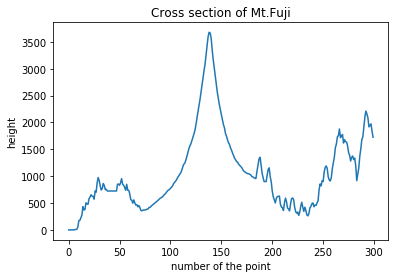

In [4]:
x = fuji[:, 0]
y = fuji[:, -2]

plt.title("Cross section of Mt.Fuji")
plt.xlabel("number of the point")
plt.ylabel("height")
plt.plot(x, y,)
plt.show()


### 【問題2】ある地点の勾配を計算する関数を作成
「二次元配列と勾配問題」では各地点での勾配を最初に求めました。しかし、暗闇の富士山を想像すると、知ることができるのは今いる地点の勾配だけです。
「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。
勾配は以下の式で求まりましたが、このデータでは「標高」がy、「その地点の番号」がxに相当します。

In [25]:
def func_gradient_calculation(_pos_now):
    _pos_now = int(_pos_now)
    if _pos_now == 0:
        return 0
    _gradient_now = fuji[_pos_now, 3] - fuji[_pos_now-1, 3]
    return _gradient_now

pos_now = 10
gradient_now = func_gradient_calculation(pos_now)
print(gradient_now)

117.15


### 【問題3】移動先の地点を計算する関数を作成
今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。

数式で表すと 「移動先の地点 = 今いる地点 - α ×今いる地点の勾配」 となります。

「今いる地点の勾配」は問題2で作成した関数の返り値を使用してください。
α は0より大きい任意の値をとるハイパーパラメータです。
機械学習の分野では学習率という名前で呼ばれます。
この値によって下り方が変わります。ここでは例えば0.2に設定してください。

実装上の注意

上記式を計算すると移動先の地点には浮動小数点数が現れますが、
今回勾配の情報を得るためには地点は整数で表す必要があります。
そのため、四捨五入による変換を行ってください。また、取り柄ない値となった場合の処理が必要です。
例えば移動先の地点が負になると、そのようなデータが存在しないため、次に勾配が得られなくなります。

ハイパーパラメータとは

機械学習手法において、その手法自身では最適化が行えない値のことです。
値によって手法の挙動は変化し、学習がうまくいくかどうかに影響を与えるため、設定は慎重に行う必要があります。
最も単純には人間が考えて設定することになりますが、ハイパーパラメータを機械的に決めるための手法も存在します。

In [26]:
def func_get_next_point(_pos_now, alpha=0.2):
    _pos_now = int(_pos_now)
    _pos_next = np.round(_pos_now - alpha * func_gradient_calculation(_pos_now)).astype(np.int)
    if _pos_next > max(fuji[:, 0]) or _pos_next < min(fuji[:, 0]):
        return "移動先の地点は、リストの範囲外です"
    return _pos_next
pos_now = 136
pos = func_get_next_point(pos_now)
print(pos)

102


### 【問題4】山を下る関数を作成 
山を下る関数を作成してください。
最初の地点を受け取り、問題3の関数によって地点を更新していきます。
移動毎の地点はリストなどに記録して、これを関数の返り値としてください。
最初の「今いる地点」は富士山の頂上付近、136番の地点（標高3434.59[m]）とします。ここから山を下っていきましょう。

実装上の注意
問題3で四捨五入を行っているため、移動先の地点が今いる地点と同じ場合になることがあります。
移動量が減ってきたということなので、その時点で山を下りきったと判断してください。実際の勾配降下法ではこのようなことは起きません。

In [51]:
def func_downhill(_pos_now, alpha=0.2):
    _pos_now = int(_pos_now)
    _next_pos_ary = np.array([_pos_now]).astype(np.int)
    _height_ary = np.array([fuji[_pos_now,3]])
    
    if type(func_get_next_point(_pos_now))==str:
        return "移動先の地点は、リストの範囲外です","移動先の地点は、リストの範囲外です"
    n=0
    while func_get_next_point(_next_pos_ary[-1]) != _next_pos_ary[-1]:#  or n<10:
        
        if type(func_get_next_point(int(_next_pos_ary[-1])))==str:
            return "移動先の地点は、リストの範囲外です","移動先の地点は、リストの範囲外です"
        _next_pos_ary = np.append(_next_pos_ary, func_get_next_point(_next_pos_ary[-1]))
        
        if type(func_get_next_point(int(_next_pos_ary[-1])))==str:
            return "移動先の地点は、リストの範囲外です","移動先の地点は、リストの範囲外です"
        _height_ary= np.append(_height_ary, fuji[func_get_next_point(_next_pos_ary[-1]), 3])
        
        if n==15:
            return _next_pos_ary, _height_ary
        n+=1
    return _next_pos_ary, _height_ary

pos_now = 136
pos_ary, height_ary = func_downhill(pos_now)
print(pos_ary)
#print(height_ary)
#func_downhill(pos_now)

[136 102  98  95  93  89  85  82  79  73  70  78  77  75]


### 【問題5】下山過程の可視化 
問題4における下山過程をMatplotlibを使いグラフで可視化してください。
可視化例
断面図の中に移動した地点を点で表示する
繰り返し毎の標高や勾配を折れ線グラフにする

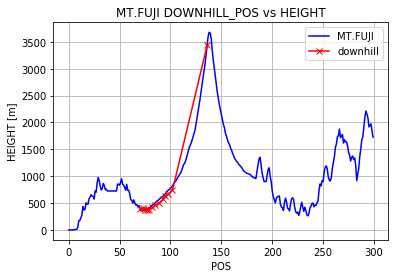

In [52]:
def func_graph(_x, _y, _x2, _y2, _label="MT.FUJI", _label2="downhill",
               _title="MT.FUJI DOWNHILL_POS vs HEIGHT", _xlabel="POS", _ylabel="HEIGHT [m]"):
    plt.title(_title)
    plt.xlabel(_xlabel)
    plt.ylabel(_ylabel)
    plt.plot(_x,_y,color="b",label=_label)
    plt.plot(_x2,_y2, marker="x",color="r",label=_label2)
    plt.grid()
    plt.legend()
    plt.show()
func_graph(x, y, pos_ary, height_ary)

### 【問題6】初期値の変更 
問題4では最初の「今いる地点」を136としましたが、これを他の全ての点で計算してください。
そして、
いくつかの初期値に対してどのような下山過程となるか、問題5のように可視化してください。

機械学習においては 初期値 をどう設定するかが結果に影響を与えることが確認できます。
初期値とは
今回の例での最初の地点のような値を初期値と呼びます。これを変更すると結果が変化します。例えば136と142では富士山の異なるの斜面を下ることになります。

In [45]:
all_downhill_ary = np.zeros((len(fuji[:,0]), 2))
all_downhill_ary.shape

(300, 2)

In [57]:
for i,pos in enumerate(range(len(fuji[:,0]))):
    pos_ary, height_ary = func_downhill(i)
    print("今いる地点＿{}".format(i))
    print("地点：{}".format(pos_ary))
    print("高さ：{}".format(height_ary))

今いる地点＿0
地点：[0]
高さ：[0.]
今いる地点＿1
地点：[1]
高さ：[0.]
今いる地点＿2
地点：[2]
高さ：[0.]
今いる地点＿3
地点：[3]
高さ：[0.]
今いる地点＿4
地点：[4]
高さ：[0.]
今いる地点＿5
地点：[5]
高さ：[0.]
今いる地点＿6
地点：[6 5]
高さ：[6.62 0.  ]
今いる地点＿7
地点：[7]
高さ：[7.21]
今いる地点＿8
地点：[8 7]
高さ：[12.2   7.21]
今いる地点＿9
地点：[9 1]
高さ：[54.41  0.  ]
今いる地点＿10
地点：移動先の地点は、リストの範囲外です
高さ：移動先の地点は、リストの範囲外です
今いる地点＿11
地点：移動先の地点は、リストの範囲外です
高さ：移動先の地点は、リストの範囲外です
今いる地点＿12
地点：[12  2]
高さ：[228.21   0.  ]
今いる地点＿13
地点：[13  4]
高さ：[275.38   0.  ]
今いる地点＿14
地点：移動先の地点は、リストの範囲外です
高さ：移動先の地点は、リストの範囲外です
今いる地点＿15
地点：[15 27 31 51 41]
高さ：[371.74 817.   880.44 724.5  724.5 ]
今いる地点＿16
地点：移動先の地点は、リストの範囲外です
高さ：移動先の地点は、リストの範囲外です
今いる地点＿17
地点：移動先の地点は、リストの範囲外です
高さ：移動先の地点は、リストの範囲外です
今いる地点＿18
地点：[18 22 13  4]
高さ：[485.39 275.38   0.     0.  ]
今いる地点＿19
地点：[19 21 15 27 31 51 41]
高さ：[477.82 371.74 701.94 817.   880.44 724.5  724.5 ]
今いる地点＿20
地点：移動先の地点は、リストの範囲外です
高さ：移動先の地点は、リストの範囲外です
今いる地点＿21
地点：[21 15 27 31 51 41]
高さ：[610.92 701.94 817.   880.44 724.5  724.5 ]
今いる地点＿22
地点：[22 13  4]
高さ：[654.96   0.     0.  ]
今いる地点＿23

今いる地点＿154
地点：[154 175 178 180 186 164 169 173 176 177 178 180 186 164 169 173 176]
高さ：[1798.99 1033.52  993.63 1203.92 1306.46 1182.32 1081.07 1049.33 1043.91
 1033.52  993.63 1203.92 1306.46 1182.32 1081.07 1049.33 1043.91]
今いる地点＿155
地点：[155 165 172 178 180 186 164 169 173 176 177 178 180 186 164 169 173]
高さ：[1748.11 1095.73 1033.52  993.63 1203.92 1306.46 1182.32 1081.07 1049.33
 1043.91 1033.52  993.63 1203.92 1306.46 1182.32 1081.07 1049.33]
今いる地点＿156
地点：[156 170 174 177 178 180 186 164 169 173 176 177 178 180 186 164 169]
高さ：[1679.25 1068.05 1043.91 1033.52  993.63 1203.92 1306.46 1182.32 1081.07
 1049.33 1043.91 1033.52  993.63 1203.92 1306.46 1182.32 1081.07]
今いる地点＿157
地点：[157 168 172 178 180 186 164 169 173 176 177 178 180 186 164 169 173]
高さ：[1623.73 1095.73 1033.52  993.63 1203.92 1306.46 1182.32 1081.07 1049.33
 1043.91 1033.52  993.63 1203.92 1306.46 1182.32 1081.07 1049.33]
今いる地点＿158
地点：[158 165 172 178 180 186 164 169 173 176 177 178 180 186 164 169 173]
高さ：[1590.97 1095.

今いる地点＿198
地点：[198 231 247 226 239 228 206 205 198 231 247 226 239 228 206 205 198]
高さ：[990.05 855.15 270.33 491.04 440.61 622.89 620.23 990.05 344.44 855.15
 270.33 491.04 440.61 622.89 620.23 990.05 344.44]
今いる地点＿199
地点：[199 218 191 208 238 232 216 219 200 234 251 215 239 228 206 205 198]
高さ：[ 895.16  973.61  479.68  437.7   423.72  391.72  582.16  723.66  278.95
 1079.27  405.96  491.04  440.61  622.89  620.23  990.05  344.44]
今いる地点＿200
地点：[200 234 251 215 239 228 206 205 198 231 247 226 239 228 206 205 198]
高さ：[ 723.66 1079.27  405.96  491.04  440.61  622.89  620.23  990.05  344.44
  855.15  270.33  491.04  440.61  622.89  620.23  990.05  344.44]
今いる地点＿201
地点：[201 222 250 253 247 226 239 228 206 205 198 231 247 226 239 228 206]
高さ：[ 616.85  901.57 1191.05  855.15  270.33  491.04  440.61  622.89  620.23
  990.05  344.44  855.15  270.33  491.04  440.61  622.89  620.23]
今いる地点＿202
地点：[202 214 227 215 239 228 206 205 198 231 247 226 239 228 206 205 198]
高さ：[556.79 332.39 405.96 491.04 44

今いる地点＿243
地点：[243 244 235 238 232 216 219 200 234 251 215 239 228 206 205 198 231]
高さ：[ 456.1   262.    437.7   423.72  391.72  582.16  723.66  278.95 1079.27
  405.96  491.04  440.61  622.89  620.23  990.05  344.44  855.15]
今いる地点＿244
地点：[244 235 238 232 216 219 200 234 251 215 239 228 206 205 198 231 247]
高さ：[ 502.93  437.7   423.72  391.72  582.16  723.66  278.95 1079.27  405.96
  491.04  440.61  622.89  620.23  990.05  344.44  855.15  270.33]
今いる地点＿245
地点：[245 237 215 239 228 206 205 198 231 247 226 239 228 206 205 198 231]
高さ：[542.   405.96 491.04 440.61 622.89 620.23 990.05 344.44 855.15 270.33
 491.04 440.61 622.89 620.23 990.05 344.44 855.15]
今いる地点＿246
地点：[246 205 198 231 247 226 239 228 206 205 198 231 247 226 239 228 206]
高さ：[749.23 990.05 344.44 855.15 270.33 491.04 440.61 622.89 620.23 990.05
 344.44 855.15 270.33 491.04 440.61 622.89 620.23]
今いる地点＿247
地点：[247 226 239 228 206 205 198 231 247 226 239 228 206 205 198 231 247]
高さ：[855.15 491.04 440.61 622.89 620.23 990.05 344.4

高さ：移動先の地点は、リストの範囲外です
今いる地点＿294
地点：移動先の地点は、リストの範囲外です
高さ：移動先の地点は、リストの範囲外です
今いる地点＿295
地点：移動先の地点は、リストの範囲外です
高さ：移動先の地点は、リストの範囲外です
今いる地点＿296
地点：[296 291 254 263 249 230 249 230 249 230 249 230 249 230 249 230 249]
高さ：[1944.63 1144.26 1599.43  915.92  422.18  915.92  422.18  915.92  422.18
  915.92  422.18  915.92  422.18  915.92  422.18  915.92  422.18]
今いる地点＿297
地点：[297 291 254 263 249 230 249 230 249 230 249 230 249 230 249 230 249]
高さ：[1973.99 1144.26 1599.43  915.92  422.18  915.92  422.18  915.92  422.18
  915.92  422.18  915.92  422.18  915.92  422.18  915.92  422.18]
今いる地点＿298
地点：移動先の地点は、リストの範囲外です
高さ：移動先の地点は、リストの範囲外です
今いる地点＿299
地点：移動先の地点は、リストの範囲外です
高さ：移動先の地点は、リストの範囲外です


地点50


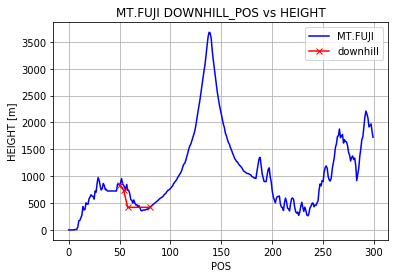

地点100


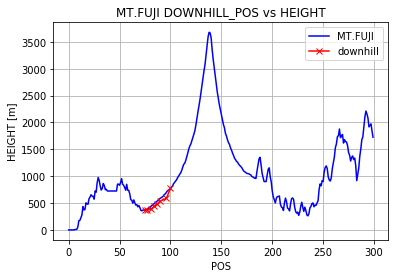

地点150


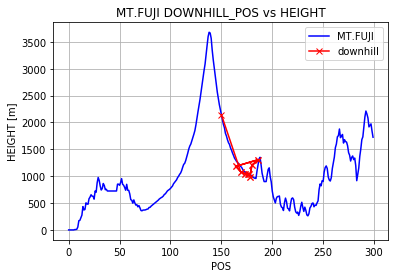

地点200


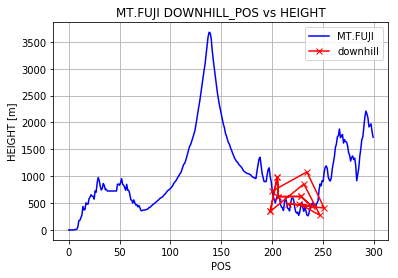

地点250


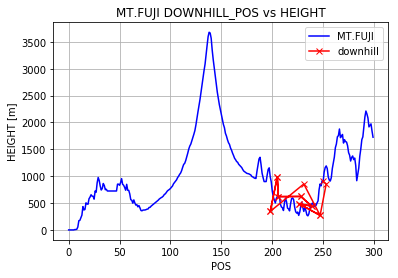

In [60]:
for pos in [50, 100, 150, 200, 250]:
    pos_ary, height_ary = func_downhill(pos)
    print("地点{}".format(pos))
    func_graph(x, y, pos_ary, height_ary)

### 【問題7】（アドバンス問題）ハイパーパラメータの変更 
ハイパーパラメータ αを変化させるとどのような下山過程となるか、問題5のように可視化してください。
そして、ハイパーパラメータにより結果が大きく異なることを確認してください。